# Exploratory Data Analysis

This notebook examines the raw data extracted by tagging the training/validation demo files.

In [21]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [35]:
# load in raw csv files
dtypes = {
    'roundWinner': 'object',
    'aliveCt': np.uint8,
    'aliveT': np.uint8,
    'meanHealthCt': np.float64,
    'meanHealthT': np.float64,
    'meanValueCt': np.float64,
    'meanValueT': np.float64,
    'roundTime': np.float64,
    'bombTime': np.float64,
    'bombDefused': np.bool_
}
converters = {
    'roundWinner': lambda v: 'CT' if int(v) == 0 else 'T'
}

train_df = pd.read_csv('./train.csv', dtype=dtypes, converters=converters)
val_df = pd.read_csv('./val.csv', dtype=dtypes, converters=converters)
all_df = pd.concat([train_df, val_df])

## Raw Data Summaries

### Training Set

In [37]:
display(train_df.describe())

,aliveCt,aliveT,meanHealthCt,meanHealthT,meanValueCT,meanValueT,roundTime,bombTime
count,668270.000000,668270.000000,668270.000000,668270.000000,668270.000000,668270.000000,668270.000000,668270.000000
mean,3.965671,3.800989,88.830806,83.148263,4715.262612,4188.812227,47.590621,2.140886
std,1.244596,1.353213,16.494673,21.291109,1943.641399,1663.035402,31.989371,6.815114
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,83.000000,75.000000,3866.666667,3725.000000,19.585938,0.000000
50%,4.000000,4.000000,95.750000,90.250000,5500.000000,4840.000000,42.734375,0.000000
75%,5.000000,5.000000,100.000000,100.000000,6160.000000,5330.000000,71.976562,0.000000
max,5.000000,5.000000,100.000000,100.000000,8250.000000,7750.000000,203.851562,63.460938


### Validation Set

In [38]:
display(val_df.describe())

,aliveCt,aliveT,meanHealthCt,meanHealthT,meanValueCT,meanValueT,roundTime,bombTime
count,167068.000000,167068.000000,167068.000000,167068.000000,167068.000000,167068.000000,167068.000000,167068.000000
mean,3.965499,3.798579,88.794276,83.095772,4711.547813,4193.602201,47.653655,2.145332
std,1.246747,1.351868,16.511832,21.315241,1941.708923,1659.285089,31.996082,6.813189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,83.000000,75.000000,3850.000000,3740.000000,19.656250,0.000000
50%,4.000000,4.000000,95.600000,90.200000,5490.000000,4850.000000,42.945312,0.000000
75%,5.000000,5.000000,100.000000,100.000000,6150.000000,5330.000000,71.906250,0.000000
max,5.000000,5.000000,100.000000,100.000000,8250.000000,7750.000000,166.484375,63.281250


## Feature Relationships

A pairwise plot of all features against each other, showing combined trends. Individual plot points are coloured blue if they represent a CT round win, and orange for a T round win.

Plots are generated from a sample of the overall dataset.

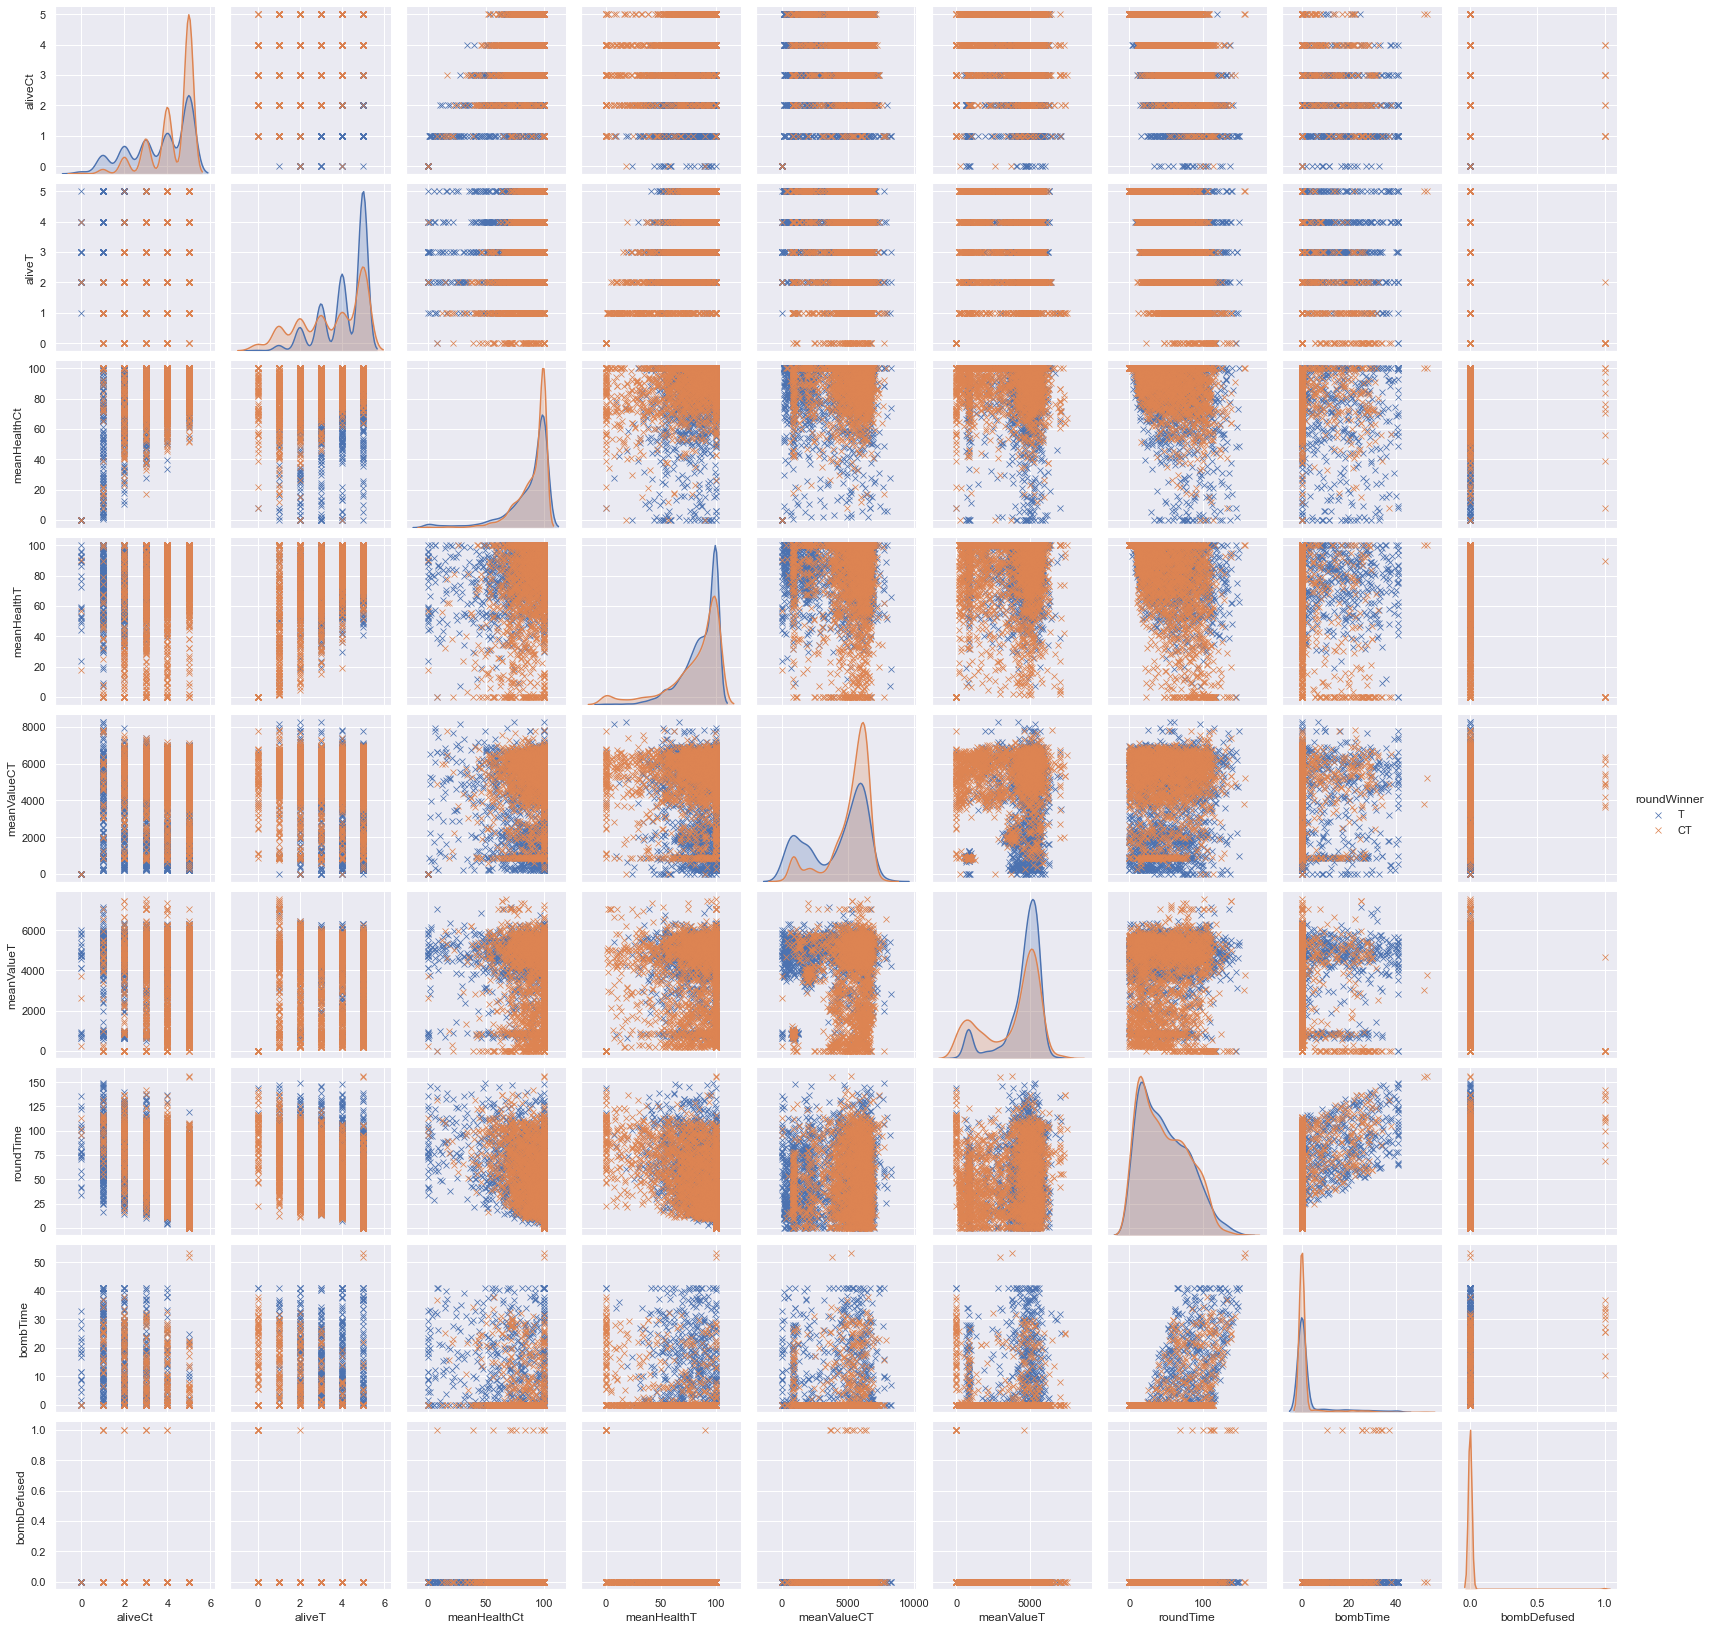

In [39]:
g = sns.pairplot(all_df.sample(n=5000, random_state=1), hue='roundWinner', markers='x')